# **Proyek Kedua : Membuat Model Machine Learning dengan Data Time**




*   Dataset yang akan dipakai bebas, namun minimal memiliki 1000 sampel.

*   Harus menggunakan LSTM dalam arsitektur model.

*  Validation set sebesar 20% dari total dataset.

*  Model harus menggunakan model sequential.

*  Harus menggunakan Learning Rate pada Optimizer.

*  MAE < 10% skala data.


Data Diri:




> Nama : Muhammad Faqih Hakim



Import Library Yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

Dataset yang akan dipakai bebas, namun minimal memiliki 1000 sampel.

Link Dataset : https://www.kaggle.com/datasets/shenba/time-series-datasets

In [2]:
df = pd.read_csv('dataset.csv')
df

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8
...,...,...
3645,12/27/1990,14
3646,12/28/1990,13.6
3647,12/29/1990,13.5
3648,12/30/1990,15.7


Karena Terdapat Beberapa data yang tidak bisa diolah maka kita bersihkan dulu data datanya

In [3]:
df['Daily minimum temperatures'].unique()

array(['20.7', '17.9', '18.8', '14.6', '15.8', '17.4', '21.8', '20',
       '16.2', '13.3', '16.7', '21.5', '25', '20.6', '24.8', '17.7',
       '15.5', '18.2', '12.1', '14.4', '16', '16.5', '18.7', '19.4',
       '17.2', '15.1', '15.4', '15.3', '21.9', '19.9', '16.6', '16.8',
       '17.1', '15', '13.7', '13.9', '18.3', '22', '22.1', '21.2', '18.4',
       '16.1', '15.7', '18.5', '16.9', '17.5', '17.8', '18.6', '17',
       '14.3', '11.4', '16.3', '11.8', '12.2', '14.7', '11.3', '10.6',
       '11.7', '14.2', '11.2', '8.1', '8', '8.8', '13.4', '10.9', '11',
       '14.5', '18.1', '10', '14.9', '15.9', '13', '7.6', '11.5', '13.5',
       '12.4', '13.2', '13.8', '9', '9.8', '8.9', '7.4', '9.9', '9.3',
       '8.6', '11.9', '14', '12', '10.5', '10.7', '10.1', '5.3', '6.6',
       '8.5', '5.9', '3.2', '2.1', '3.4', '5.4', '9.6', '12.3', '12.6',
       '12.8', '11.6', '5.7', '7.1', '2.5', '3.5', '4.6', '7.7', '10.4',
       '9.2', '6.1', '2.7', '4.3', '6.3', '3.8', '4.4', '4.8', '5.8',
   

kita ubah data nya menjadi numeric dan Untuk data Yang tidak bisa diubah ke Numeric ubah menjadi nan

In [4]:
df['Daily minimum temperatures'] = pd.to_numeric(df['Daily minimum temperatures'], errors='coerce')
df.isna().sum()

Date                          0
Daily minimum temperatures    3
dtype: int64

drop nan

In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3647 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        3647 non-null   object 
 1   Daily minimum temperatures  3647 non-null   float64
dtypes: float64(1), object(1)
memory usage: 85.5+ KB


In [6]:
df.isna().sum()

Date                          0
Daily minimum temperatures    0
dtype: int64

In [7]:
date = df['Date'].values
mintemp = df['Daily minimum temperatures'].values

Buat Plot untuk melihat sifat Data

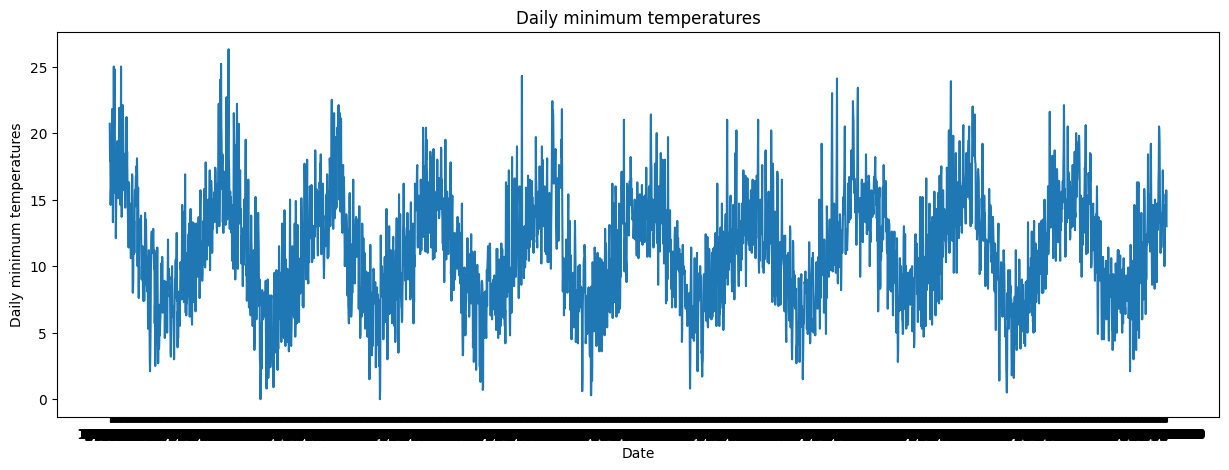

In [8]:
plt.figure(figsize=(15,5))
plt.plot(date, mintemp)
plt.xlabel('Date')
plt.ylabel('Daily minimum temperatures')
plt.title('Daily minimum temperatures')
plt.show()

dapat dilihat disini menunjukkan bahwa data ini merupakan time series yang sifatnya musiman.

Buat fungsi untuk Windowing data

In [9]:
def windowed_dataset(series, size, batch, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(size + 1))
    ds = ds.shuffle(shuffle)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch).prefetch(1)

Implementasi Callback dimana train model akan dihentikan saat MAE sudah terpenuhi



In [10]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('mae') < 2.3:
            print("\nMAE telah Lebih kecil dari 10% data")
            self.model.stop_training = True
callbacks = myCallback()

Validation set sebesar 20% dari total dataset.

In [11]:
date = df['Date'].values
temp = df['Daily minimum temperatures'].values

date_train, date_val, temp_train, temp_val = train_test_split(date, temp, test_size=0.2, shuffle=False)

In [12]:
train_set = windowed_dataset(temp_train, 30, 100, 1000)
val_set = windowed_dataset(temp_val, 30, 100, 1000)

Harus menggunakan LSTM dalam arsitektur model dan menggunakan model sequential.

In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(1),
])

Harus menggunakan Learning Rate pada Optimizer.

In [14]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

periksa Ambang batas MAE

In [15]:
batas_mae = (df['Daily minimum temperatures'].max() - df['Daily minimum temperatures'].min()) * 10/100
print(batas_mae)

2.63


Latih Model

In [16]:
history = model.fit(train_set,
                    epochs=100,
                    callbacks=[callbacks],
                    validation_data=val_set)

Epoch 1/100
29/29 [==============================] - 11s 188ms/step - loss: 10.3576 - mae: 10.8569 - val_loss: 10.5015 - val_mae: 11.0010
Epoch 2/100
29/29 [==============================] - 3s 82ms/step - loss: 10.1321 - mae: 10.6312 - val_loss: 10.2702 - val_mae: 10.7694
Epoch 3/100
29/29 [==============================] - 2s 77ms/step - loss: 9.8906 - mae: 10.3896 - val_loss: 10.0114 - val_mae: 10.5108
Epoch 4/100
29/29 [==============================] - 3s 115ms/step - loss: 9.6090 - mae: 10.1077 - val_loss: 9.6972 - val_mae: 10.1963
Epoch 5/100
29/29 [==============================] - 2s 75ms/step - loss: 9.2559 - mae: 9.7547 - val_loss: 9.2923 - val_mae: 9.7901
Epoch 6/100
29/29 [==============================] - 2s 76ms/step - loss: 8.7721 - mae: 9.2704 - val_loss: 8.7029 - val_mae: 9.1995
Epoch 7/100
29/29 [==============================] - 2s 75ms/step - loss: 8.0718 - mae: 8.5688 - val_loss: 7.8734 - val_mae: 8.3711
Epoch 8/100
29/29 [==============================] - 3s 104m

terlihat bahwa batas MAE terpenuhi (2.63>2.2553)

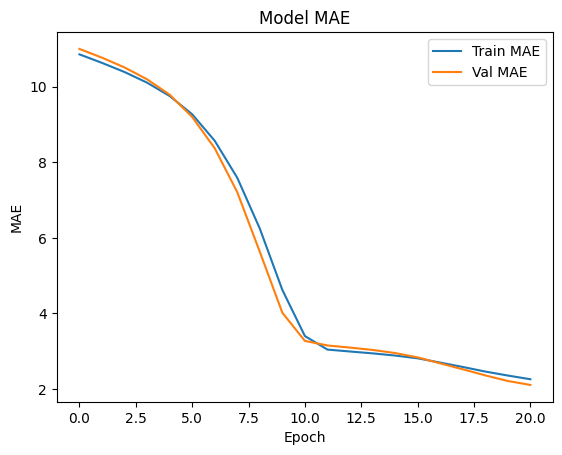

In [17]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()